# EG24 CITE-seq and flow cytometry comparisons

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
from ridgeplot import ridgeplot

import sklearn.mixture

import warnings

warnings.filterwarnings('ignore')

Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


Sample used in this notebook is EG24. 

### Sample information:
- ALL 
- collected at relapse
- 80% of bonemarrow cells are blasts


## Preparing files

In [3]:
#raw protein data, all datasets

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/healthy_malig_!m.h5ad')

adata.shape

(298991, 8051)

In [52]:
#get flow data

flow= pd.read_csv('/Users/tiinatuononen/Desktop/Thesis/Project/data/flow.csv')

In [53]:
#Checking what king of values we have for EG24

egflow=flow[flow['EG_code'] == 'EG24'].dropna(axis=1)

egflow

,EG_code,CD10,CD19,CD22,CD34,CD38,CD58,CD66c,CD133,HLA-DR
1,EG24,1.0,1.0,1.0,0.68,1.0,1.0,0.45,0.51,1.0


In [54]:
#drop EG_code

egflow=egflow.drop("EG_code", axis=1)

egflow

,CD10,CD19,CD22,CD34,CD38,CD58,CD66c,CD133,HLA-DR
1,1.0,1.0,1.0,0.68,1.0,1.0,0.45,0.51,1.0


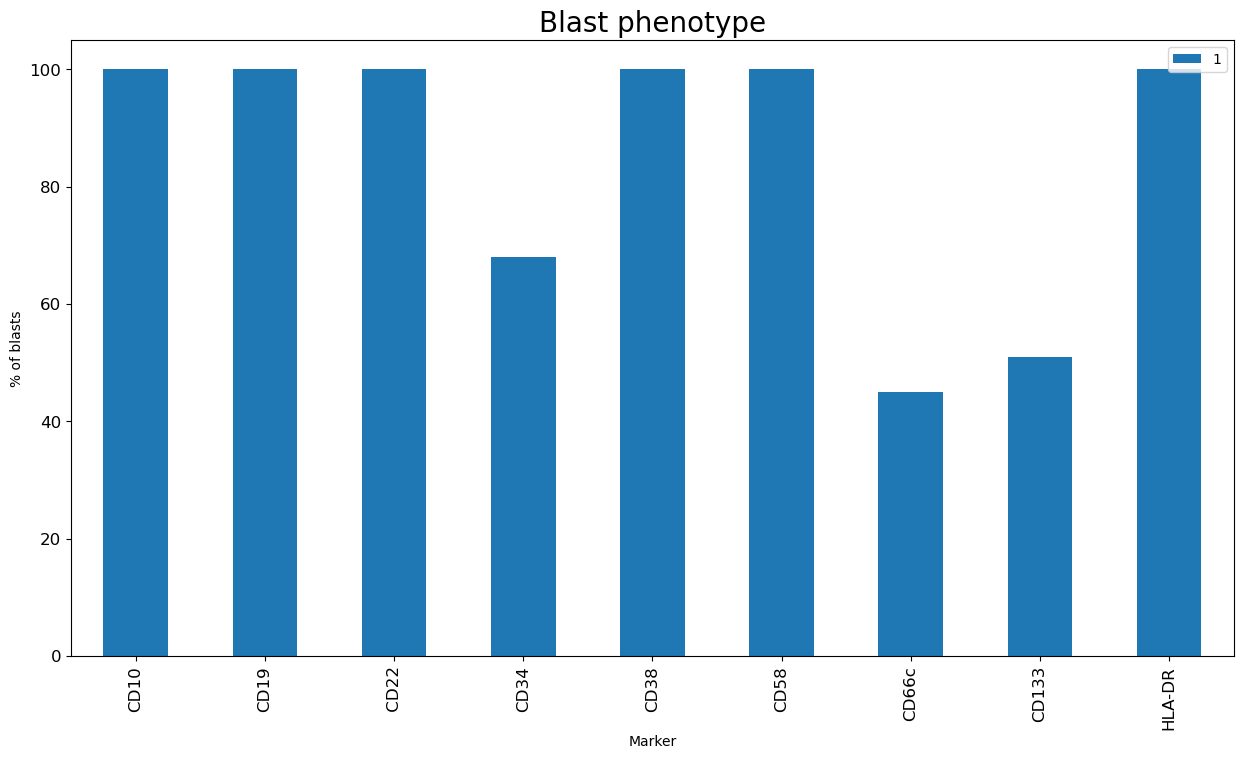

In [55]:
df=egflow * 100 #multiplied by 100 to get percentages

df1=df.T

df1.plot.bar(xlabel="Marker", ylabel="% of blasts",
            figsize= (15,8),
           fontsize="large") ;

plt.title('Blast phenotype', fontsize=20) ;

In [49]:
flow_markers=egflow.columns

In [9]:
#raw protein data, all datasets

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/healthy_malig_!m.h5ad')

adata.shape

(298991, 8051)

In [25]:
#select sample from big anndata file
adata_24 = adata[adata.obs.eg_code == 'EG24'].copy()

## CLR

In [20]:
#all CLR data

adata_prot_clr= sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_prot_clr (1).h5ad')

In [26]:
#selecting sample from normalized protein data

adata_24_clr = adata_prot_clr[adata_prot_clr.obs.EG_code == 'EG24']

In [27]:
adata_24

AnnData object with n_obs × n_vars = 1067 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [41]:
adata_24_clr.copy()

AnnData object with n_obs × n_vars = 1189 × 33
    obs: 'nCount_RNA', 'nFeature_RNA', 'bc', 'propmt', 'rna_size', 'ngene', 'prot_size', 'predicted.id', 'hashMax', 'adtMax', 'nHashPos', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'EG_code', 'Donor', 'prediction.score.CD14..monocyte.1', 'prediction.score.CD14..monocyte.2', 'prediction.score.NK', 'prediction.score.CD4..T.1', 'prediction.score.NK.T.1', 'prediction.score.NK.T.2', 'prediction.score.CD4..T.3', 'prediction.score.Conventional.dendritic.cell', 'prediction.score.7_immatureB', 'prediction.score.Late.erythoid.precursor.2', 'prediction.score.Early.erythoid.precursor', 'prediction.score.max', 'n_genes', 'S_score', 'G2M_score', 'phase', 'leiden', 'leiden_r1', 'T.CD4.Naive_score', 'T.CD4.TE_score', 'Tregs_score', 'Tfh_score', 'Th1_score', 'Th1.Th17_score', 'Th17_score', 'Th2_score', 'T.CD8.Naive_score', 'T.CD8.CM_score', 'T.CD8.EM_score', 'T.CD8.TE_score', 'T.gd.Vd2_score', '

In [29]:
adata_24.obs["cell_type"] == "leukemic"

AAACGGGTCTACTTAC-1-119    True
AAAGATGAGGAGTAGA-1-119    True
AAAGCAACACAGACTT-1-119    True
AAAGCAACAGGGTATG-1-119    True
AAAGCAACATCACAAC-1-119    True
                          ... 
TTTGCGCAGCCAACAG-1-119    True
TTTGGTTAGAGCTGCA-1-119    True
TTTGTCAAGGTTCCTA-1-119    True
TTTGTCAGTATCACCA-1-119    True
TTTGTCATCAATCACG-1-119    True
Name: cell_type, Length: 1067, dtype: bool

In [30]:
adata_24_clr.obs.index

Index(['AAACGGGTCTACTTAC-1', 'AAAGATGAGGAGTAGA-1', 'AAAGATGCAATGAAAC-1',
       'AAAGCAACACAGACTT-1', 'AAAGCAACAGGGTATG-1', 'AAAGCAACATCACAAC-1',
       'AAAGTAGAGGCGCTCT-1', 'AAAGTAGCATGACATC-1', 'AAAGTAGGTATCTGCA-1',
       'AAAGTAGGTTACAGAA-1',
       ...
       'TTTATGCTCTCGTTTA-1', 'TTTCCTCAGAAACCTA-1', 'TTTCCTCCACATTCGA-1',
       'TTTCCTCTCAGTTGAC-1', 'TTTGCGCAGCCAACAG-1', 'TTTGGTTAGAGCTGCA-1',
       'TTTGGTTGTTAGAACA-1', 'TTTGTCAAGGTTCCTA-1', 'TTTGTCAGTATCACCA-1',
       'TTTGTCATCAATCACG-1'],
      dtype='object', length=1189)

In [34]:
adata_24.obs.index

Index(['AAACGGGTCTACTTAC-1', 'AAAGATGAGGAGTAGA-1', 'AAAGCAACACAGACTT-1',
       'AAAGCAACAGGGTATG-1', 'AAAGCAACATCACAAC-1', 'AAAGTAGAGGCGCTCT-1',
       'AAAGTAGCATGACATC-1', 'AAAGTAGGTTACAGAA-1', 'AAAGTAGTCGAACTGT-1',
       'AAAGTAGTCGACGGAA-1',
       ...
       'TTTACTGCACGTAAGG-1', 'TTTATGCGTGGGTATG-1', 'TTTCCTCAGAAACCTA-1',
       'TTTCCTCCACATTCGA-1', 'TTTCCTCTCAGTTGAC-1', 'TTTGCGCAGCCAACAG-1',
       'TTTGGTTAGAGCTGCA-1', 'TTTGTCAAGGTTCCTA-1', 'TTTGTCAGTATCACCA-1',
       'TTTGTCATCAATCACG-1'],
      dtype='object', length=1067)

In [32]:
#remove identifiers from the ends

def remove_tail(x):
    return x[:-4]
adata_24.obs.index = pd.Index(pd.Series(adata_24.obs.index).apply(remove_tail))

In [35]:
adata_24

AnnData object with n_obs × n_vars = 1067 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [36]:
adata_24_clr

View of AnnData object with n_obs × n_vars = 1189 × 33
    obs: 'nCount_RNA', 'nFeature_RNA', 'bc', 'propmt', 'rna_size', 'ngene', 'prot_size', 'predicted.id', 'hashMax', 'adtMax', 'nHashPos', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'EG_code', 'Donor', 'prediction.score.CD14..monocyte.1', 'prediction.score.CD14..monocyte.2', 'prediction.score.NK', 'prediction.score.CD4..T.1', 'prediction.score.NK.T.1', 'prediction.score.NK.T.2', 'prediction.score.CD4..T.3', 'prediction.score.Conventional.dendritic.cell', 'prediction.score.7_immatureB', 'prediction.score.Late.erythoid.precursor.2', 'prediction.score.Early.erythoid.precursor', 'prediction.score.max', 'n_genes', 'S_score', 'G2M_score', 'phase', 'leiden', 'leiden_r1', 'T.CD4.Naive_score', 'T.CD4.TE_score', 'Tregs_score', 'Tfh_score', 'Th1_score', 'Th1.Th17_score', 'Th17_score', 'Th2_score', 'T.CD8.Naive_score', 'T.CD8.CM_score', 'T.CD8.EM_score', 'T.CD8.TE_score', 'T.gd.Vd2_s

In [42]:
#removing cells that are not common between data files

selector = adata_24_clr.obs.index.isin(adata_24.obs.index)

In [43]:
selector

array([ True,  True, False, ...,  True,  True,  True])

In [44]:
#includes only common cells
selected_df = adata_24_clr.to_df()[selector]

In [45]:
#normalized protein counts

selected_df

,CD19,CD10,CD20,CD3,CD2,CD11b,HLADR,CD38,CD11c,CD7,...,CD5,CD15,CD64,CD117,CD24,CD44,CD58,CD66ace,CD13,CD34
AAACGGGTCTACTTAC-1,1.736651,3.117820,1.405150,0.796443,0.796443,0.931404,1.873557,1.270729,0.606020,0.000000,...,0.325352,0.673604,1.050297,0.228207,0.673604,1.725300,0.606020,0.413889,0.277958,0.767119
AAAGATGAGGAGTAGA-1,0.996005,3.812860,1.220955,0.450533,0.205109,0.647437,0.996005,0.760010,0.375225,0.000000,...,0.450533,0.450533,0.520565,0.293780,1.186804,2.086596,0.705307,0.450533,0.205109,0.953053
AAAGCAACACAGACTT-1,1.197050,3.369727,1.521922,0.297546,0.592563,0.526562,1.231351,0.712779,0.379852,0.109318,...,0.455895,0.526562,0.820082,0.207854,1.161531,2.280266,0.592563,0.379852,0.000000,0.962119
AAAGCAACAGGGTATG-1,1.322475,3.996407,0.364943,0.199028,0.631731,0.688622,1.054951,1.092575,0.507207,0.199028,...,0.199028,0.842125,0.364943,0.285422,1.292695,1.820520,0.793529,0.631731,0.199028,0.932758
AAAGCAACATCACAAC-1,1.484887,4.283628,1.032351,0.337687,0.471598,0.589676,1.507382,0.643868,0.337687,0.337687,...,0.406883,0.532379,0.589676,0.263346,0.532379,1.875396,0.877948,0.643868,0.337687,1.389481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCAGCCAACAG-1,0.886533,4.360054,0.437436,0.791729,0.437436,1.090390,2.161279,0.505900,0.284606,0.104131,...,0.284606,0.363938,0.437436,0.505900,0.630192,2.222564,0.437436,0.840254,0.000000,1.663946
TTTGGTTAGAGCTGCA-1,1.128562,3.500698,0.841896,0.631542,0.742240,0.438460,1.128562,1.054689,0.571231,0.198955,...,0.631542,0.571231,0.841896,0.198955,0.688422,2.201066,0.841896,0.198955,0.198955,0.438460
TTTGTCAAGGTTCCTA-1,1.019816,3.765607,0.482698,1.642062,0.634640,0.535952,1.432900,0.724457,0.535952,0.303460,...,0.482698,0.426447,0.535952,0.426447,0.766512,2.022730,0.919000,1.111393,0.084924,1.195282
TTTGTCAGTATCACCA-1,1.461947,3.748793,1.694896,1.404094,0.395433,0.636162,1.384042,0.636162,0.339460,0.339460,...,0.339460,0.678061,0.217136,0.280167,0.961936,2.142172,0.678061,0.678061,0.077737,1.461947


In [46]:
adata_24.obsm['protein_expression_clr'] = selected_df

adata_24.obsm

AxisArrays with keys: X_pca, X_totalVI, X_umap, protein_expression, protein_expression_clr

In [47]:
eg24_blasts_clr=adata_24.obsm['protein_expression_clr']

In [50]:
#Selecting common markers between flow and cite-seq

listOfMarkers=flow_markers
column_names=list()    #list including the common markers

for x in listOfMarkers:
    if x in eg24_blasts_clr.columns:
        print(x, "Yes")
        column_names.append(x)
    else:
        print(x, "No") 
        
print(column_names)

CD10 Yes
CD19 Yes
 CD22 No
CD34 Yes
CD38 Yes
CD58 Yes
CD66c No
CD133 No
HLA-DR No
['CD10', 'CD19', 'CD34', 'CD38', 'CD58']


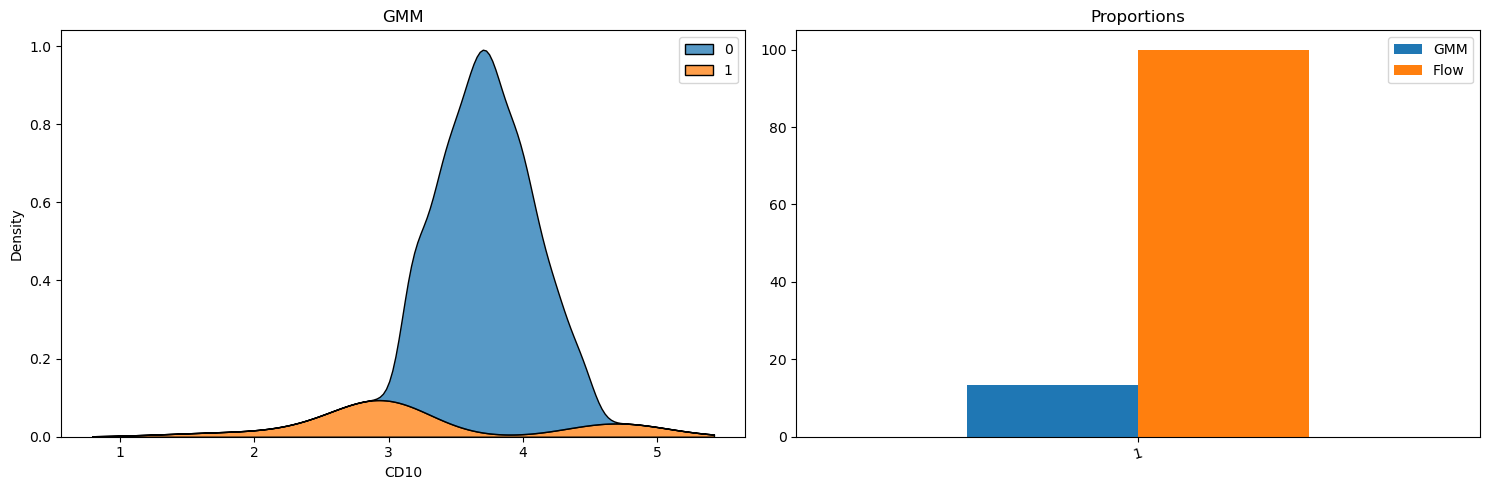

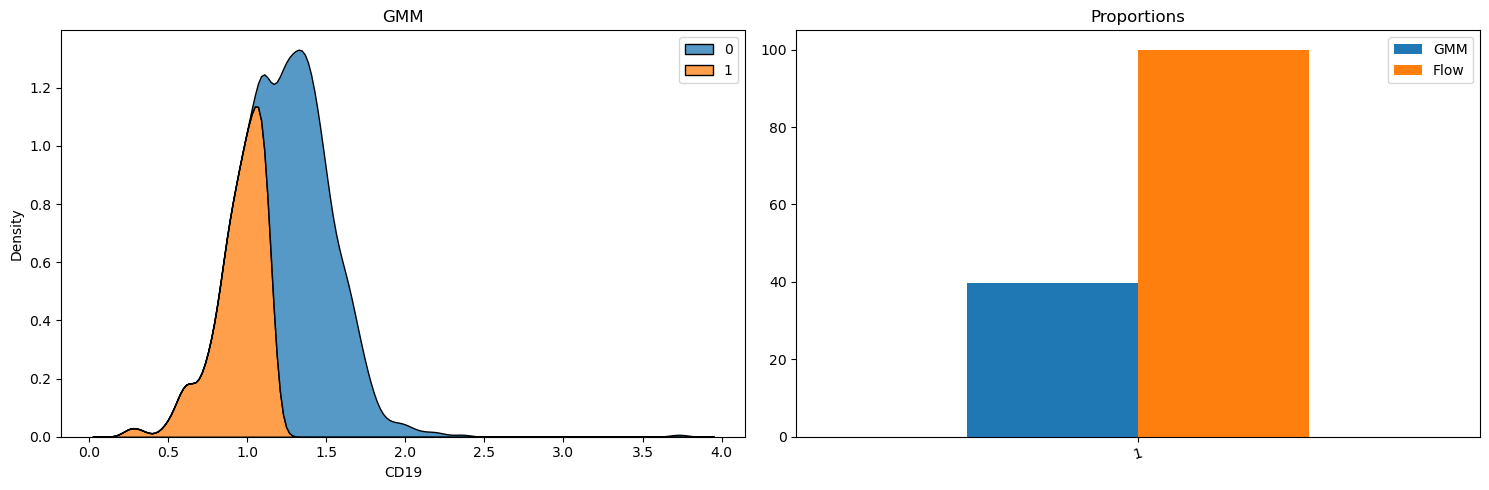

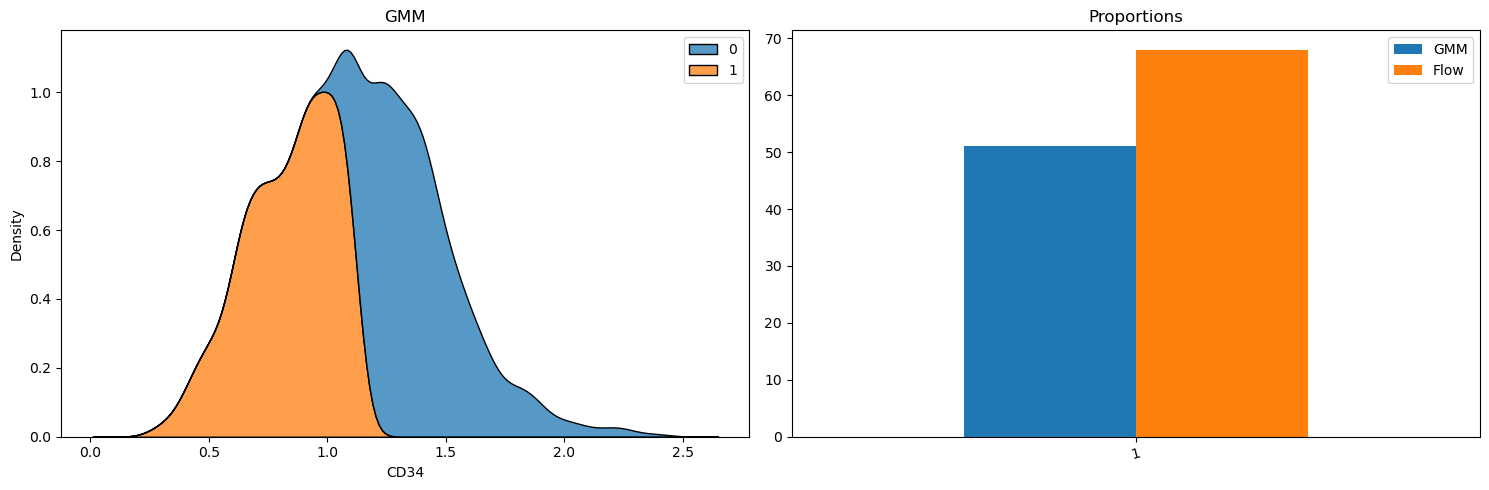

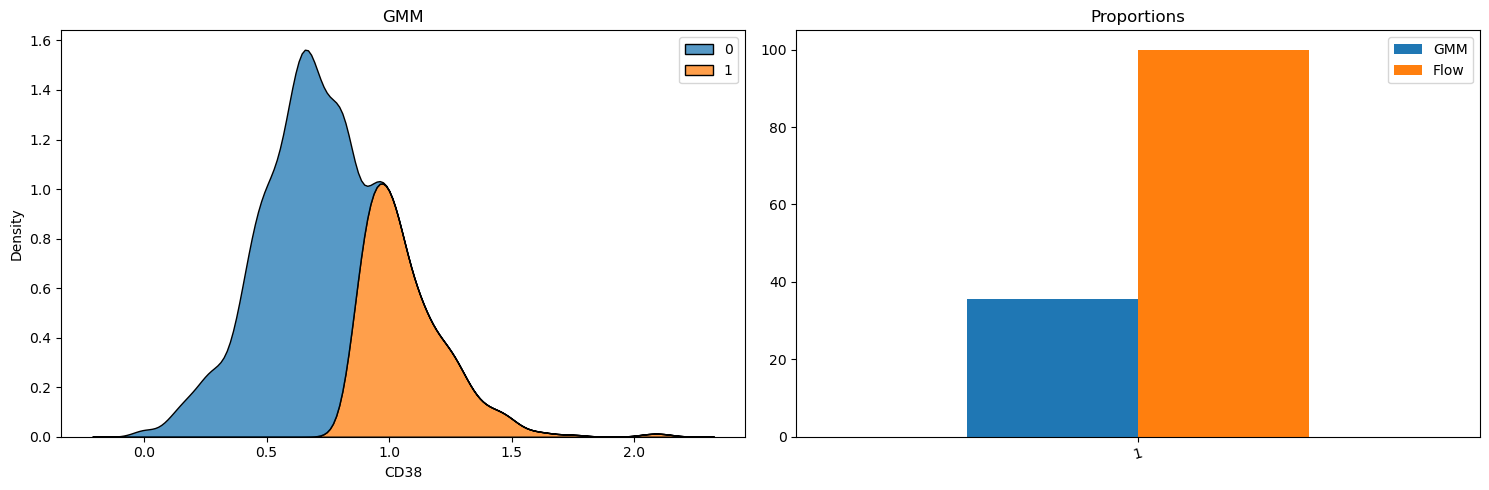

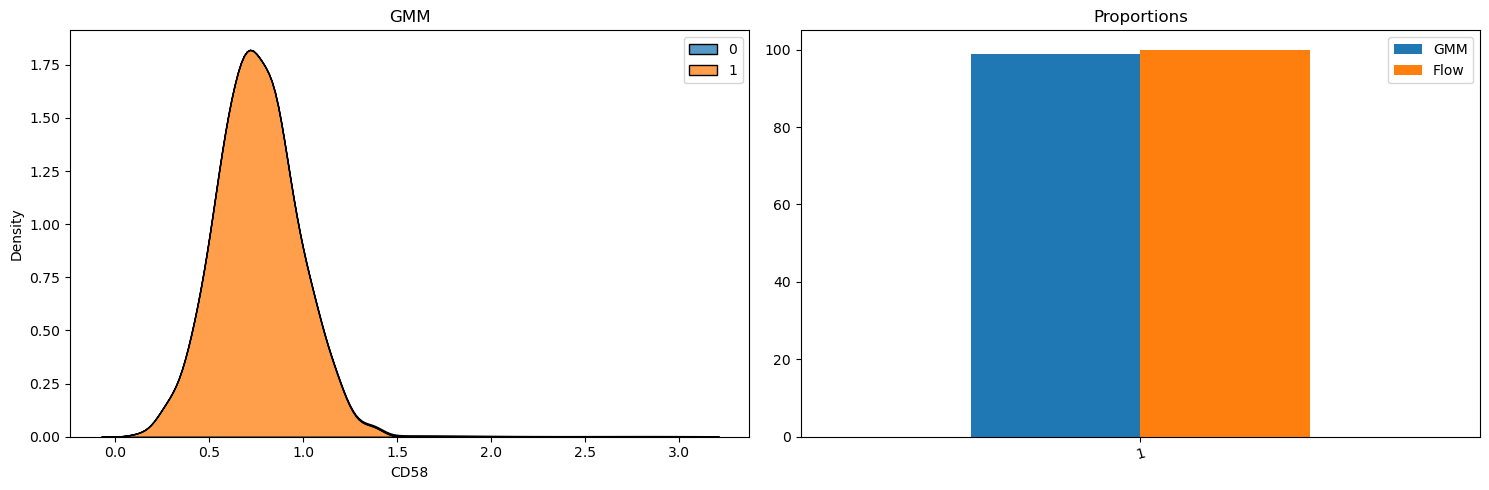

In [56]:
#Only leukemic cells selected

#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "full",
                                      random_state = 42
                                        )
#data

data=eg24_blasts_clr
n_cells=len(eg24_blasts_clr)
egflow=egflow * 100 #to get percentages
for column_name in column_names:
    fig, ax =plt.subplots(1,2,tight_layout=True, figsize=(15, 5))
    fig.show()
    
    x= data[column_name]
    x=x.values.reshape(-1, 1)
    gmm.fit(x)
    labels = gmm.predict(x)
    
    ax1 = sns.kdeplot(data=data, x=column_name, hue=labels, multiple="stack", ax=ax[0]) ;
    ax1.title.set_text('GMM')
       
    #Calculate zeros
    n_zeros = np.count_nonzero(labels==0)
    result_zeros=(n_zeros/n_cells * 100)
    #Calculate ones
    n_ones=np.count_nonzero(labels)
    result_ones=(n_ones/n_cells * 100)
    #Dataframes
    all_data = {"GMM":[result_ones],
        "Flow": egflow[column_name],
        };

    all_data= pd.DataFrame(data=all_data);
    
    ax2=all_data.plot.bar(rot=15, title=column_name,ax=ax[1]);
    ax2.title.set_text('Proportions')
    
    plt.show()

## DSB

In [57]:
adata_prot_dsb= sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_prot_dsb (1).h5ad')

In [58]:
adata_24_dsb=adata_prot_dsb[adata_prot_dsb.obs['EG_code'] == 'EG24']

In [59]:
adata_24_dsb.copy()

AnnData object with n_obs × n_vars = 1189 × 33
    obs: 'nCount_RNA', 'nFeature_RNA', 'bc', 'propmt', 'rna_size', 'ngene', 'prot_size', 'predicted.id', 'hashMax', 'adtMax', 'nHashPos', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'EG_code', 'Donor', 'prediction.score.CD14..monocyte.1', 'prediction.score.CD14..monocyte.2', 'prediction.score.NK', 'prediction.score.CD4..T.1', 'prediction.score.NK.T.1', 'prediction.score.NK.T.2', 'prediction.score.CD4..T.3', 'prediction.score.Conventional.dendritic.cell', 'prediction.score.7_immatureB', 'prediction.score.Late.erythoid.precursor.2', 'prediction.score.Early.erythoid.precursor', 'prediction.score.max', 'n_genes', 'S_score', 'G2M_score', 'phase', 'leiden', 'leiden_r1', 'T.CD4.Naive_score', 'T.CD4.TE_score', 'Tregs_score', 'Tfh_score', 'Th1_score', 'Th1.Th17_score', 'Th17_score', 'Th2_score', 'T.CD8.Naive_score', 'T.CD8.CM_score', 'T.CD8.EM_score', 'T.CD8.TE_score', 'T.gd.Vd2_score', '

In [60]:
adata_24

AnnData object with n_obs × n_vars = 1067 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr'
    obsp: 'connectivities', 'distances'

In [61]:
adata_24.obs.index

Index(['AAACGGGTCTACTTAC-1', 'AAAGATGAGGAGTAGA-1', 'AAAGCAACACAGACTT-1',
       'AAAGCAACAGGGTATG-1', 'AAAGCAACATCACAAC-1', 'AAAGTAGAGGCGCTCT-1',
       'AAAGTAGCATGACATC-1', 'AAAGTAGGTTACAGAA-1', 'AAAGTAGTCGAACTGT-1',
       'AAAGTAGTCGACGGAA-1',
       ...
       'TTTACTGCACGTAAGG-1', 'TTTATGCGTGGGTATG-1', 'TTTCCTCAGAAACCTA-1',
       'TTTCCTCCACATTCGA-1', 'TTTCCTCTCAGTTGAC-1', 'TTTGCGCAGCCAACAG-1',
       'TTTGGTTAGAGCTGCA-1', 'TTTGTCAAGGTTCCTA-1', 'TTTGTCAGTATCACCA-1',
       'TTTGTCATCAATCACG-1'],
      dtype='object', length=1067)

In [62]:
adata_24_dsb.obs.index

Index(['AAACGGGTCTACTTAC-1', 'AAAGATGAGGAGTAGA-1', 'AAAGATGCAATGAAAC-1',
       'AAAGCAACACAGACTT-1', 'AAAGCAACAGGGTATG-1', 'AAAGCAACATCACAAC-1',
       'AAAGTAGAGGCGCTCT-1', 'AAAGTAGCATGACATC-1', 'AAAGTAGGTATCTGCA-1',
       'AAAGTAGGTTACAGAA-1',
       ...
       'TTTATGCTCTCGTTTA-1', 'TTTCCTCAGAAACCTA-1', 'TTTCCTCCACATTCGA-1',
       'TTTCCTCTCAGTTGAC-1', 'TTTGCGCAGCCAACAG-1', 'TTTGGTTAGAGCTGCA-1',
       'TTTGGTTGTTAGAACA-1', 'TTTGTCAAGGTTCCTA-1', 'TTTGTCAGTATCACCA-1',
       'TTTGTCATCAATCACG-1'],
      dtype='object', length=1189)

In [63]:
#removing cells that are not common between data files

selector = adata_24_dsb.obs.index.isin(adata_24.obs.index)

In [64]:
#includes only common cells
selected_df = adata_24_dsb.to_df()[selector]

In [65]:
selected_df.shape

(1067, 33)

In [66]:
adata_24.obsm['protein_expression_dsb'] = selected_df

adata_24.obsm

AxisArrays with keys: X_pca, X_totalVI, X_umap, protein_expression, protein_expression_clr, protein_expression_dsb

In [67]:
eg24_blasts_dsb=adata_24.obsm['protein_expression_dsb']

In [68]:
eg24_blasts_dsb.shape

(1067, 33)

In [69]:
#Selecting common markers between flow and cite-seq

listOfMarkers=flow_markers
column_names=list()    #list including the common markers

for x in listOfMarkers:
    if x in eg24_blasts_dsb.columns:
        print(x, "Yes")
        column_names.append(x)
    else:
        print(x, "No") 
        
print(column_names)

CD10 Yes
CD19 Yes
 CD22 No
CD34 Yes
CD38 Yes
CD58 Yes
CD66c No
CD133 No
HLA-DR No
['CD10', 'CD19', 'CD34', 'CD38', 'CD58']


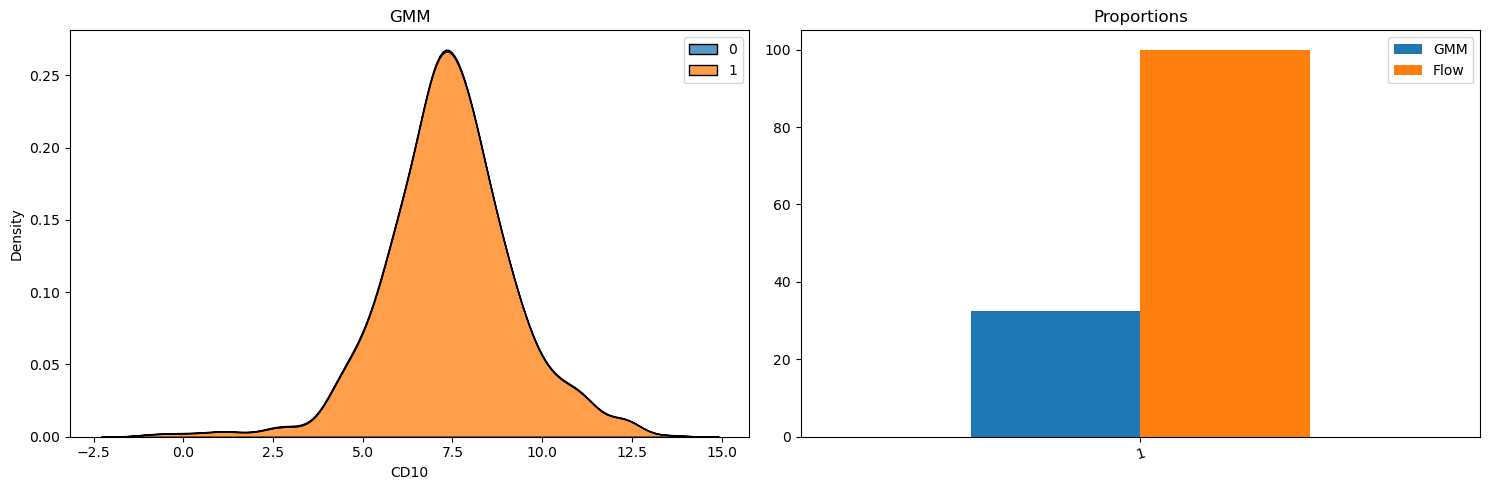

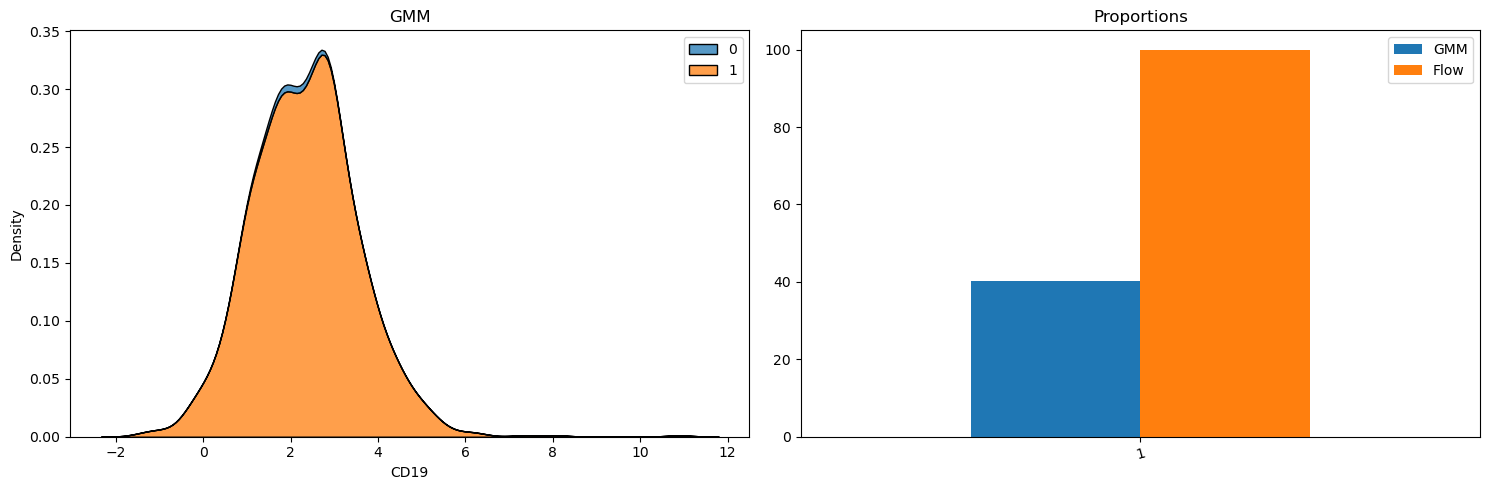

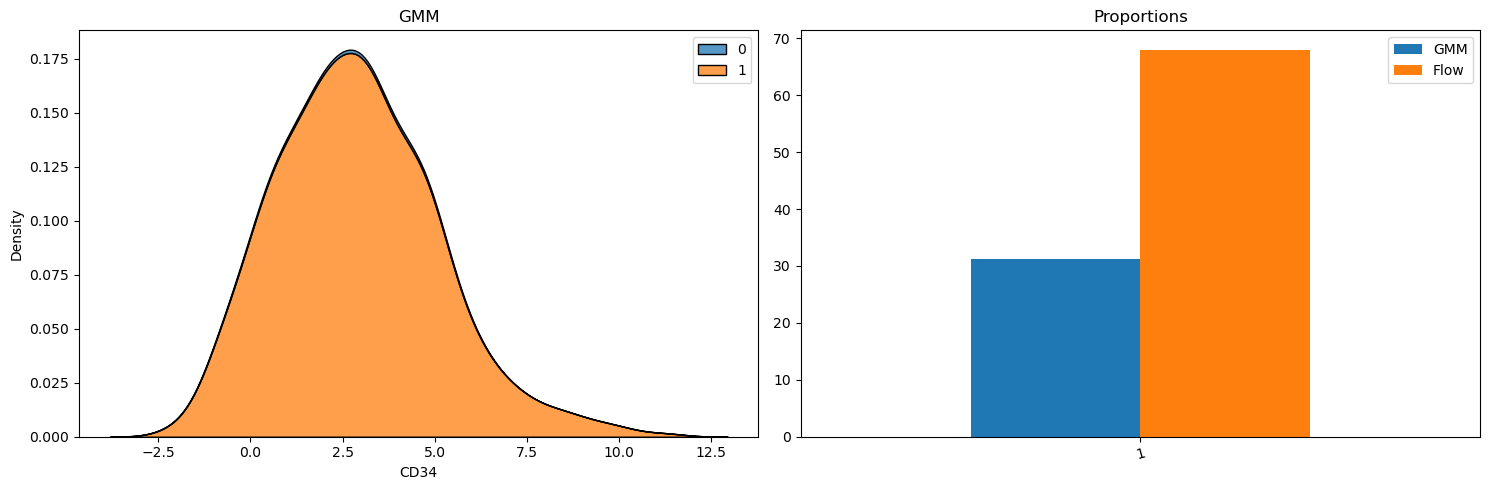

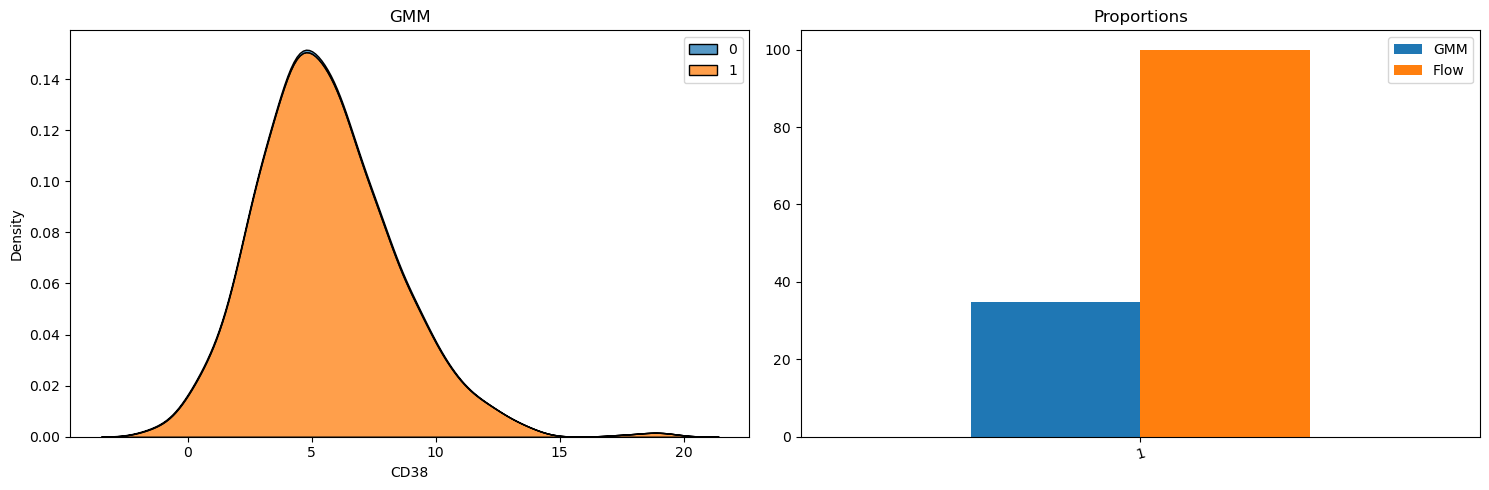

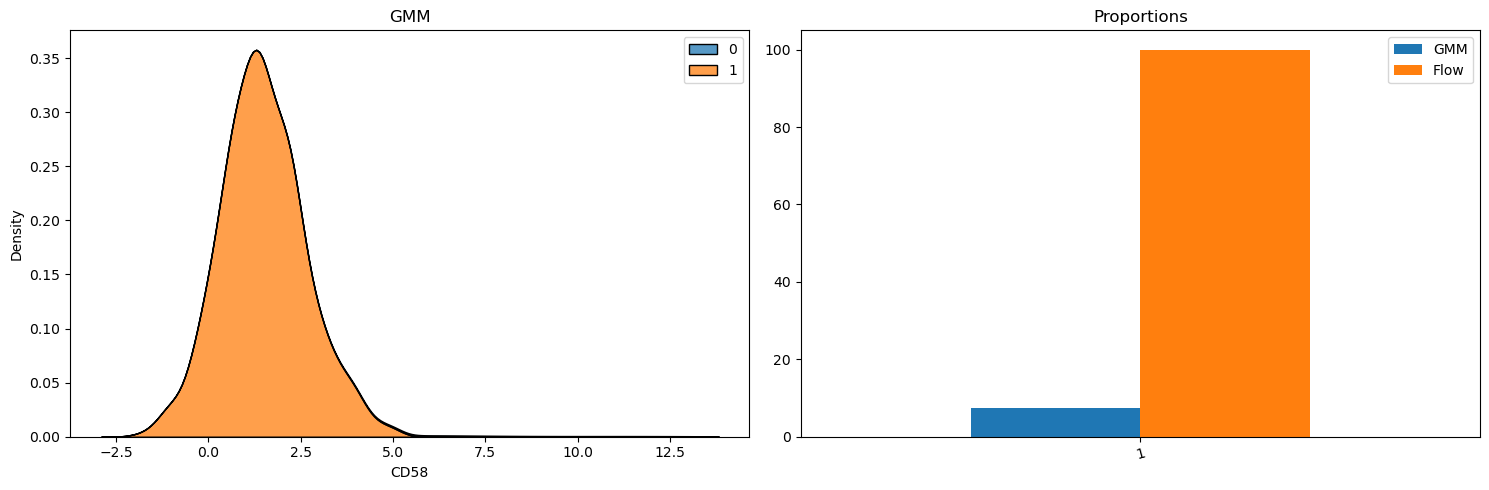

In [75]:
#Only leukemic cells selected

#model
gmm = sklearn.mixture.GaussianMixture(n_components = 2,
                                      covariance_type = "full",
                                      random_state = 42
                                        )
#data

data=eg24_blasts_dsb
n_cells=len(eg24_blasts_dsb)
egflow=egflow #* 100 #to get percentages
for column_name in column_names:
    fig, ax =plt.subplots(1,2,tight_layout=True, figsize=(15, 5))
    fig.show()
    
    x2= data[column_name]
    x2=x2.values.reshape(-1, 1)
    gmm.fit(x2)
    labels2 = gmm.predict(x2)
    
    ax1 = sns.kdeplot(data=data, x=column_name, hue=labels, multiple="stack", ax=ax[0]) ;
    ax1.title.set_text('GMM')
       
    #Calculate zeros
    n_zeros2 = np.count_nonzero(labels2==0)
    result_zeros2=(n_zeros2/n_cells * 100)
    #Calculate ones
    n_ones2=np.count_nonzero(labels2)
    result_ones2=(n_ones2/n_cells * 100)
    #Dataframes
    all_data2 = {"GMM":[result_ones2],
        "Flow": egflow[column_name],
        };

    all_data2= pd.DataFrame(data=all_data2);
    
    ax2=all_data2.plot.bar(rot=15, title=column_name,ax=ax[1]);
    ax2.title.set_text('Proportions')
    
    plt.show()